In [1]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib.colors import LogNorm, Normalize

# import matplotlib.lines as mlines, Line2D
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
# from scipy import stats, optimize
from scipy.stats import norm, lognorm, gmean
import textwrap

In [2]:
save_dir='Figures'
mpl.style.use('seaborn')
sns.set_style('whitegrid')
# present_dir= '..\Presentations\Compare'
rc_pars = {'legend.facecolor': 'white', 'legend.framealpha': 0.85, "lines.linewidth": 3,
           'legend.edgecolor':'Black', 'legend.frameon': True,
           'legend.fancybox': True, 'legend.shadow': False,
           'figure.figsize': [10, 7],'figure.dpi': 300}
sns.set_context('talk',  rc=rc_pars )

C:\Users\Ron Sender\AppData\Local\Temp\ipykernel_12076\2408809300.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


In [3]:
hor_df = pd.read_excel(
    "database.xlsx",
    sheet_name="Database of clinically assayed ",
    skiprows=1,
    skipfooter=3,
    index_col="Hormone primary name",
)

In [4]:
# hor_df = pd.read_csv('hormones_database - data_clean.csv', skiprows=1, skipfooter=3, index_col='Name', engine='python')
# hor_df = pd.read_excel('hormones_database.xlsx', sheet_name='data_clean', skiprows=1, skipfooter=3, index_col='Name')
ad_df = hor_df[~hor_df.Adrenal_matrix_for_figure.isnull()]
ad_df = ad_df.assign(ad_row=ad_df.Adrenal_matrix_for_figure.str[:1],
                     ad_col=ad_df.Adrenal_matrix_for_figure.str[-1:])
ad_df.head()

condition/modifier  \
Hormone primary name                      
Testosterone, total                 NaN   
Cortisol                           p.m.   
Aldosterone                         NaN   
Androstenedione                     NaN   
DHEA                                NaN   

                                                 Additional names  \
Hormone primary name                                                
Testosterone, total        Total Testosterone, Serum Testosterone   
Cortisol                                                      NaN   
Aldosterone                                                   NaN   
Androstenedione       Androst-4-ene-3,17-dione, 4-Androstenedione   
DHEA                                       Dehydroepiandrosterone   

                         Key System             Label            Test Name  \
Hormone primary name                                                         
Testosterone, total     Reproductive     Testosterone  Testosterone, total   
Cortisol              Adrenal cortex         Cortisol             Cortisol   
Aldosterone           Adrenal cortex      Aldosterone          Aldosterone   
Androstenedione       Adrenal cortex  Androstenedione      Androstenedione   
DHEA                  Adrenal cortex             DHEA                 DHEA   

                            hormone_state  for_ref_person  for_scatter  \
Hormone primary name                                                     
Testosterone, total   Testosterone, total             1.0          1.0   
Cortisol                            total             1.0          1.0   
Aldosterone                           NaN             1.0          1.0   
Androstenedione                       NaN             1.0          1.0   
DHEA                                  NaN             1.0          1.0   

                     Adrenal_matrix_for_figure  Molecular weight (dalton)  \
Hormone primary name                                                        
Testosterone, total                         R2                     288.42   
Cortisol                                    F3                     362.46   
Aldosterone                                 G4                     360.40   
Androstenedione                             R1                     286.40   
DHEA                                        R0                     288.40   

                      ... min_pg_ml.1 max_pg_ml.1 geomean_pg_ml.1  total_ug.1  \
Hormone primary name  ...                                                       
Testosterone, total   ...        80.0       600.0      219.089023    0.525814   
Cortisol              ...         NaN         NaN    52915.026220  126.996063   
Aldosterone           ...         NaN         NaN       39.019226    0.093646   
Androstenedione       ...       300.0      2000.0      774.596669    1.859032   
DHEA                  ...         NaN         NaN     3216.737478    7.720170   

                         total_g.1  moles_circulating_hormones.1  \
Hormone primary name                                               
Testosterone, total   5.258137e-07                  1.823083e-09   
Cortisol              1.269961e-04                  3.503726e-07   
Aldosterone           9.364614e-08                  2.598395e-10   
Androstenedione       1.859032e-06                  6.491034e-09   
DHEA                  7.720170e-06                  2.676897e-08   

                     num_circulating_molecules.1  Ref for steady states  \
Hormone primary name                                                      
Testosterone, total                 1.097860e+15                    NaN   
Cortisol                            2.109940e+17                    NaN   
Aldosterone                         1.564753e+14                    NaN   
Androstenedione                     3.908900e+15                    NaN   
DHEA                                1.612030e+16                    NaN   

                      ad_row  ad_col  
Hormone primary nam

In [8]:
'''
This function return the numbers in the right format for labeling
'''
def format_new(x):
    if x>9.5:
        return '{:0.0f}'.format(np.round(x,-int(np.floor(np.log10(x)))))
    else: 
        return '{:0.1g}'.format(x)

In [10]:
df

ad_row  row_num  ad_col    total_ug  log_mass      lg_size  \
Label                                                                           
DHEA                    R        1       0    9.650212  2.266980   853.395986   
Androstenedione         R        1       1    2.323790  0.843199   568.639895   
Testosterone            R        1       2   14.324804  2.661993   932.398511   
17-OH Pregnenolone      F        2       0    4.745788  1.557257   711.451481   
17-OHP                  F        2       1    0.629285 -0.463171   307.365893   
11-deoxycortisol        F        2       2    1.306292  0.267193   453.438589   
Cortisol                F        2       3  158.745079  5.067300  1413.459927   
Pregnenolone            G        3       0    2.713964  0.998410   599.682051   
Progesterone            G        3       1    0.201246 -1.603227    79.354670   
DOC                     G        3       2    0.073485 -2.610678  -122.135633   
Corticosterone          G        3       3    8.626239  2.154809   830.961722   
Aldosterone             G        3       4    0.117058 -2.145088   -29.017698   

                       lin_size       p_size       ddx val_label  \
Label                                                              
DHEA                  96.502124   286.974782  0.129646        10   
Androstenedione       23.237900   114.952151  0.100408         2   
Testosterone         143.248037   365.464439  0.139881        10   
17-OH Pregnenolone    47.457876   183.749765  0.113732         5   
17-OHP                 6.292853    43.979636  0.081180       0.6   
11-deoxycortisol      13.062925    76.962550  0.091246         1   
Cortisol            1587.450787  1497.931265  0.231966       200   
Pregnenolone          27.139639   127.574113  0.103104         3   
Progesterone           2.012461    12.637175  0.066714       0.2   
DOC                    0.734847          NaN       NaN      0.07   
Corticosterone        86.262390   267.732599  0.126930         9   
Aldosterone            1.170577          NaN       NaN       0.1   

                                  full_label  
Label                                         
DHEA                             DHEA\n10 μg  
Androstenedione        Androstenedione\n2 μg  
Testosterone             Testosterone\n10 μg  
17-OH Pregnenolone  17-OH Pregnenolone\n5 μg  
17-OHP                        17-OHP\n0.6 μg  
11-deoxycortisol      11-deoxycortisol\n1 μg  
Cortisol                    Cortisol\n200 μg  
Pregnenolone              Pregnenolone\n3 μg  
Progesterone            Progesterone\n0.2 μg  
DOC                             DOC\n0.07 μg  
Corticosterone          Corticosterone\n9 μg  
Aldosterone              Aldosterone\n0.1 μg

c:\Users\Ron Sender\Dropbox (Weizmann Institute)\Human Cells\Hormones project\hormones_distribution\horm_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ron Sender\Dropbox (Weizmann Institute)\Human Cells\Hormones project\hormones_distribution\horm_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ron Sender\Dropbox (Weizmann Institute)\Human Cells\Hormones project\hormones_distribution\horm_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cate

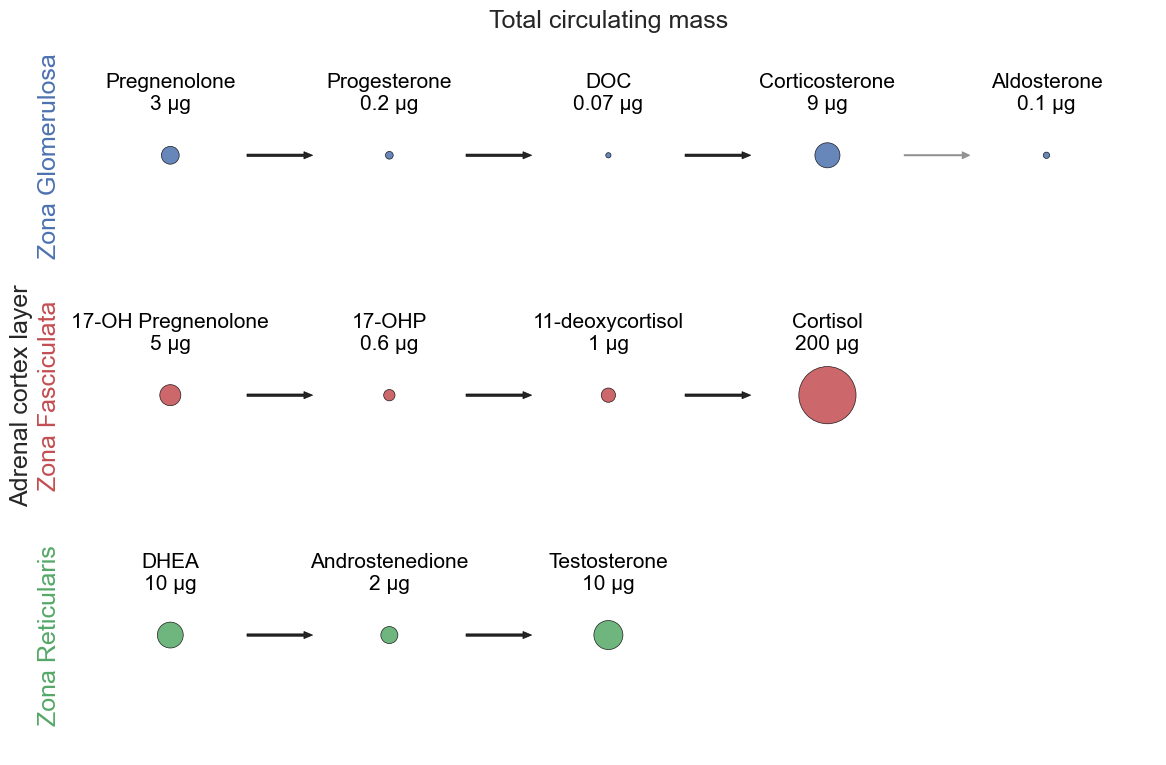

In [11]:
wrapper = textwrap.TextWrapper(width=20)
fig, ax = plt.subplots()
fig_inches = (12, 8)
fig.set_size_inches(fig_inches)
dpi = 100
fig.set_dpi(dpi)

row_ord = ["G", "F", "R"]
rows_full_name = ["Zona Glomerulosa", "Zona Fasciculata", "Zona Reticularis"]
ad_df["row_num"] = ad_df.ad_row.map(dict(zip(row_ord, np.arange(3, 0, -1))))
mass_lbl = "total_ug"
df = ad_df.set_index("Label")[
    [
        "ad_row",
        "row_num",
        "ad_col",
        mass_lbl,
    ]
].copy()
clrs = ["C0", "C2", "C1"]
row_clr_dict = dict(zip(row_ord, clrs))
df["ad_col"] = df["ad_col"].astype(int)

df["log_mass"] = np.log(df[mass_lbl])
df["ad_col"] = df["ad_col"].astype(int)
df["lg_size"] = 200 * (4 + df.log_mass)
df["lin_size"] = df[mass_lbl] * 10
df["p_size"] = df[["lg_size", "lin_size"]].apply(gmean, axis=1)

kws = dict(
    alpha=0.85,
    linewidth=0.5,
    edgecolor="k",
)
ax = sns.scatterplot(
    data=df,
    x="ad_col",
    y="row_num",
    hue="ad_row",
    s=df.p_size,
    palette=row_clr_dict,
    legend=False,
    ax=ax,
    **kws
)
ax.set_ylim(0.5, 3.5)
ax.set_xlim(-0.5, 4.5)

ax.grid()
ax.get_xaxis().set_visible(False)
ax.set_ylabel("Adrenal cortex layer")
ax.set_yticks(range(1, 4))
ax.set_yticklabels([])
for i, rw in enumerate(row_ord):
    ax.text(
        -0.55,
        3 - i,
        s=rows_full_name[i],
        ha="center",
        va="center",
        color=row_clr_dict[rw],
        rotation=90,
    )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

fac = dpi * fig_inches[0] * fig_inches[1] * 1.15
df["ddx"] = (df.p_size / np.pi) ** 0.5 / fig_inches[0] / dpi**0.5 + 0.05

df = df.sort_values(["row_num", "ad_col"])

df["val_label"] = df[mass_lbl].map(format_new)
df["full_label"] = df.index.astype(str) + "\n" + df.val_label.astype(str) + " μg"

width = 0.01
ar_color = "k"
ar_length = 0.3
for i, ind in enumerate(df.index):
    ax.annotate(
        df.loc[ind, "full_label"],
        xy=(df.loc[ind, "ad_col"], df.loc[ind, "row_num"] + 0.26),
        ha="center",
        va="center",
        color="black",
        fontsize=15,
    )
    if i < df.shape[0] - 1:
        if df.iloc[i].row_num == df.iloc[i + 1].row_num:
            if df.iloc[i + 1].name == "Aldosterone":
                ax.arrow(
                    df.loc[ind, "ad_col"] + (1 - ar_length) / 2,
                    df.loc[ind, "row_num"],
                    ar_length,
                    0,
                    color="grey",
                    width=0.5 * width,
                    length_includes_head=True,
                    head_length=3.5 * width,
                    head_width=3 * width,
                    **kws
                )
            else:
                ax.arrow(
                    df.loc[ind, "ad_col"] + (1 - ar_length) / 2,
                    df.loc[ind, "row_num"],
                    ar_length,
                    0,
                    facecolor=ar_color,
                    width=width,
                    length_includes_head=True,
                    head_length=4 * width,
                    **kws
                )

ax.set_title("Total circulating mass")
plt.tight_layout()
plt.savefig("{}/Adrenal_arrows.png".format(save_dir), dpi=150)

In [12]:
save_dir

'Figures'